Analysis OF Zomato Online Delivery data to solve a business problem


Importing all the necessary Libraries

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [13]:
original_data = pd.read_csv("/content/Zomato data .csv")
print(original_data.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


This Data set has 148x7 rows and columns respectively. WE need  to perform analysis on this data

But before performing analysis we can notice that the column rate has a string data type and won't be helpful for calculations so we need to make it float and get rid of denominator part. We can do this by using the below functon

In [18]:
# val = "4.5/5"
# v = val.split('/')
# v = float(v[0])
# print(type(v))

def handleRate(value):
    value = str(value).split("/")
    value = float(value[0])
    return value

data['rate'] = data['rate'].apply(handleRate)
print(data)

                      name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          

Here the function did it's job and the rate data which is inside the data variable is now in float format

use **.info()** to gauge the overall summary of the dataset. This also tells us if there is any null value in the dataset, if yes then we got to fill it or remove it completely.
Luckily there is **NO NULL VALUE** in this data set so we can continue

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Let's look at the type of restraunt we mostly have in this dataset using ***listed_in(type)*** column

Text(0, 0.5, 'Type of restraunt')

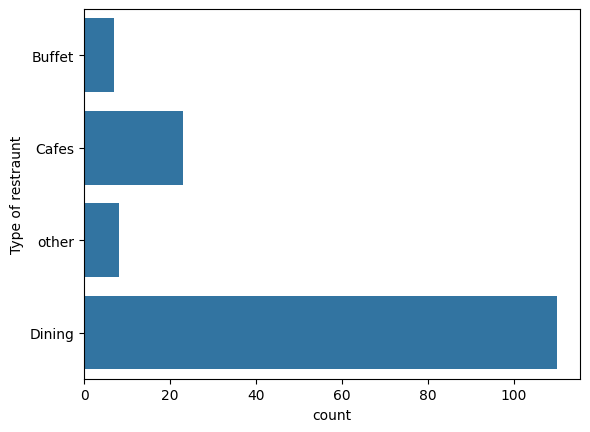

In [36]:
#Vertical Plot
sns.countplot(data["listed_in(type)"])
plt.ylabel("Type of restraunt")

Text(0, 0.5, 'Count')

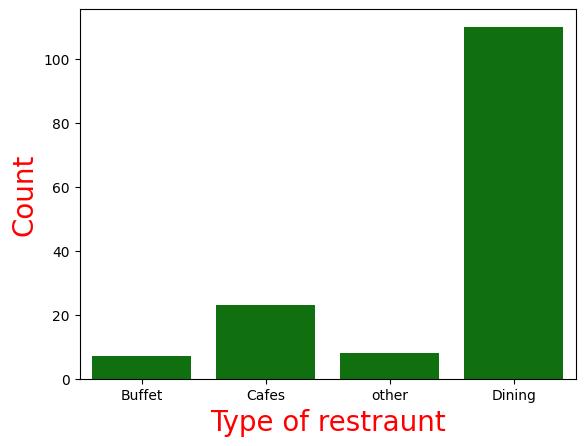

In [49]:
#Horizontal plot

sns.countplot(data, x= 'listed_in(type)', color = 'green')
plt.xlabel("Type of restraunt", fontsize = 20, c="red")
plt.ylabel("Count", fontsize=20, c="red")

**CONCLUSION : We can infer that majority of the restraunts falls under Dining category**

Text(0, 0.5, 'Number of Votes')

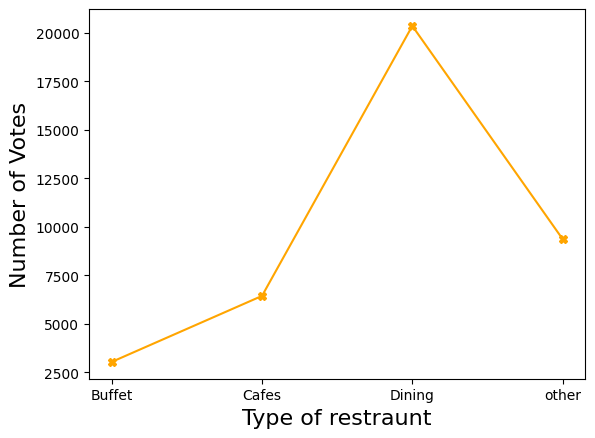

In [73]:
grouped_data = data.groupby('listed_in(type)')['votes'].sum()  #groupby() this function groups the data based on some category in this case grouped by votes
# print(grouped_data)                                             #sun() function to sum each data point into some group, otherwise the grouped data would be in [pandas format] non useable format
result = pd.DataFrame({"votes":grouped_data})
# print(result)
plt.plot(result, c='orange', marker ="X")
plt.xlabel("Type of restraunt", size = 16)
plt.ylabel("Number of Votes", size = 16)

**CONCLUSIN : Majority of people prefer Dining over any other type of restraunts**
                          "or"

"Conclusion: Dining restaurants are preferred by a larger number of individuals."

===============================================================

Now we will determine the restaurant’s name that received the maximum votes based on a given dataframe.

In [83]:
max_votes = data["votes"].max()
restraunt_with_max_votes = data.loc[data['votes'] == max_votes, 'name']
print(restraunt_with_max_votes )
print("number of votes = ", max_votes)

38    Empire Restaurant
Name: name, dtype: object
number of votes =  4884


***CONCLUSION: The Restraunt with most number of votes is Empire Restraunt***



---

Let's work with online and offline orders

Text(0, 0.5, 'Count of orders')

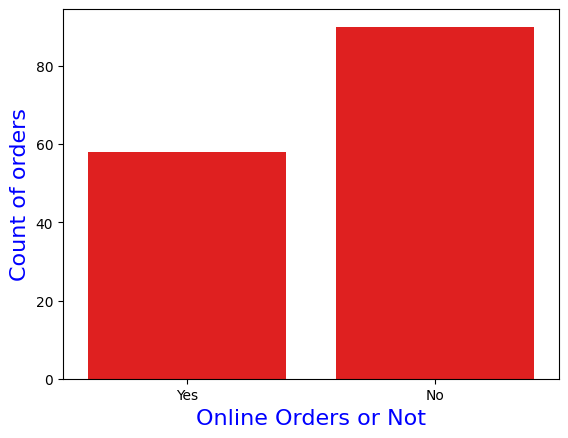

In [96]:
sns.countplot(data , x='online_order', color = 'red' )
plt.xlabel("Online Orders or Not", size = 16, c = 'blue')
plt.ylabel("Count of orders", size = 16, c = 'blue')

***CONCLUSION : This indicates that many Restraunts don't have online service***


---

Let's explore ratings of restraunts

Text(0.5, 1.0, 'Rating Distribution:')

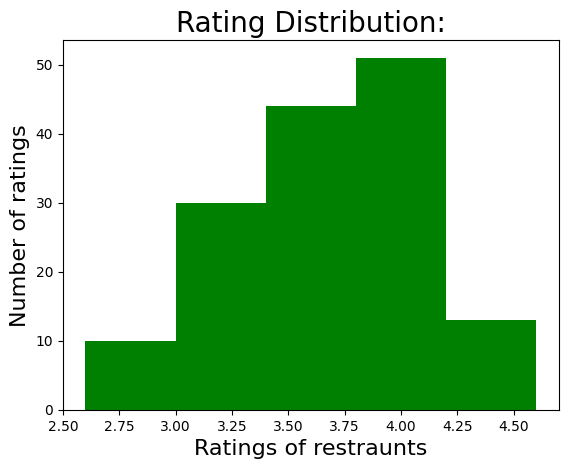

In [104]:
# z = ["red","green","yellow","blue","pink"]
plt.hist(data['rate'], bins = 5, color = "green")
plt.xlabel("Ratings of restraunts", size = 16)
plt.ylabel("Number of ratings", size = 16)
plt.title("Rating Distribution:", size =20)

***CONCLUSION : We infer than majority of restraunts were rated 3.5 to 4***


---

Let’s explore the approx_cost(for two people) column.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

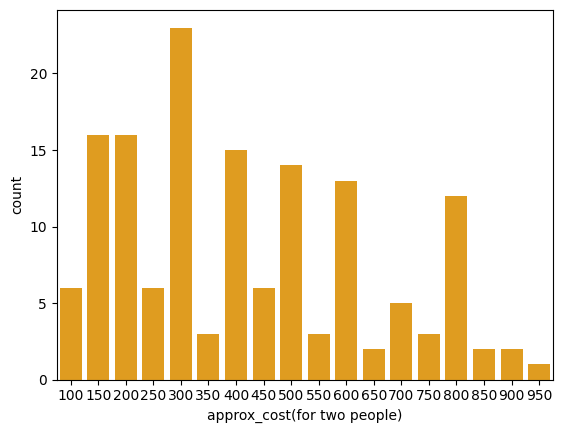

In [108]:
couple_data = data['approx_cost(for two people)']
sns.countplot(x = couple_data, color='orange')

***CONCLUSION: We can say majority of people who are visiting in a duo prefers to spend an average cost of 300rs***


---

Now we will examine whether online orders receive higher ratings than offline orders.

<Axes: xlabel='online_order', ylabel='rate'>

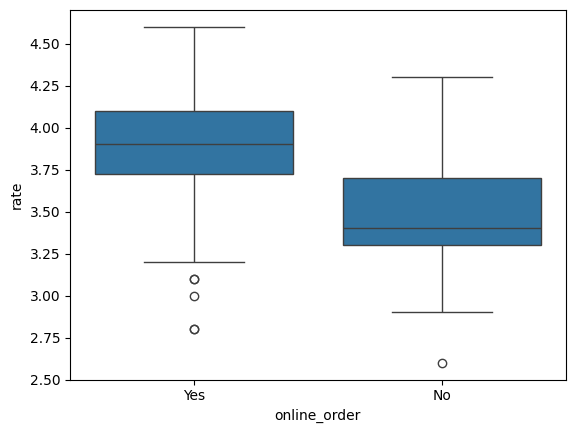

In [113]:
sns.boxplot(data=data, x = 'online_order', y = 'rate')

***CONCLUSION : Online orders are rated more than offline orders***


---



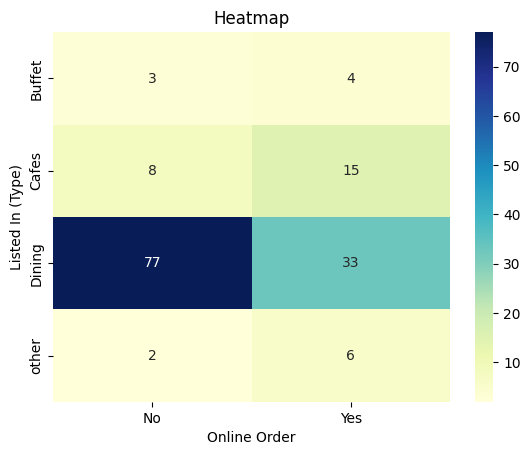

In [114]:

pivot_table = data.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

***CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.***